In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

%matplotlib inline

In [ ]:
# !wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/dataset_sms_spam_v1.csv

In [ ]:
data = pd.read_csv('b2 label gofood.csv', sep=';')
data.head()

,Tweet,tanggal,label
0,Ada voc voucher gofood 70% ga ya? Yg minbel 10...,21/02/2023,1
1,need voucher gofood yg udah gf+ #zonauanv,10/02/2023,1
2,Hidup ini bukan berlomba2 melawan teman melain...,16/02/2023,1
3,mau voc gofood minbel 30k dong #zonauang,20/02/2023,1
4,gofood apa ya jam sgini?,21/02/2023,1


In [ ]:
indexLabel = data[ (data['label'] == 0)].index
data.drop(indexLabel , inplace=True)
data.head(15)

,Tweet,tanggal,label
0,Ada voc voucher gofood 70% ga ya? Yg minbel 10...,21/02/2023,1
1,need voucher gofood yg udah gf+ #zonauanv,10/02/2023,1
2,Hidup ini bukan berlomba2 melawan teman melain...,16/02/2023,1
3,mau voc gofood minbel 30k dong #zonauang,20/02/2023,1
4,gofood apa ya jam sgini?,21/02/2023,1
5,Pengen gofood minuman dehh,22/02/2023,1
6,Sabtu Minggu gofood nyari yg simple,04/02/2023,1
7,"udah seminggu ga kemana mana, keluar cuma buat...",20/02/2023,1
8,Wtb jasa co gofood yg cashback diitung diskon ...,10/02/2023,1
9,mesen gofood apa ya enaknya?,18/02/2023,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    990 non-null    object
 1   tanggal  990 non-null    object
 2   label    990 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 23.3+ KB


In [ ]:
# positif = data[data['label'] == 1]
# negatif = data[data['label'] == 2]
# print(positif.shape)
# print(negatif.shape)

In [ ]:
# from sklearn.utils import resample
# positif_downsample = resample(positif,
#              replace=True,
#              n_samples=len(negatif),
#              random_state=42)

# print(positif_downsample.shape)

In [ ]:
# data = pd.concat([positif_downsample, negatif])
# print(data["label"].value_counts())

In [ ]:
data.head()

,Tweet,tanggal,label
0,Ada voc voucher gofood 70% ga ya? Yg minbel 10...,21/02/2023,1
1,need voucher gofood yg udah gf+ #zonauanv,10/02/2023,1
2,Hidup ini bukan berlomba2 melawan teman melain...,16/02/2023,1
3,mau voc gofood minbel 30k dong #zonauang,20/02/2023,1
4,gofood apa ya jam sgini?,21/02/2023,1


# Text Preprocessing

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'#([a-zA-Z0-9_]{1,50})','', text)  # menghapus hashtag
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [ ]:
raw_sample = data['Tweet'].iloc[5]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  Pengen gofood minuman dehh
Case folding	:  pengen gofood minuman dehh


### normalisasi

In [ ]:
!pip -q install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.6 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Download corpus singkatan
# !wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

In [ ]:
key_norm = pd.read_csv('key_norm.csv', sep=';')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

### filtering

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['rb', 'k', 'in', 'nya', 'ajg', 'anjir', 'anjing']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = data['Tweet'].iloc[17]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  Pengen gofood minuman dehh
Case folding		:  pengen gofood minuman dehh
Stopword removal	:  pengen gofood minuman dehh


### stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = data['Tweet'].iloc[17]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

KeyError: ignored

### pipeline

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = stemming(text)
  text = remove_stop_words(text)
  return text

In [ ]:
%%time
data['clean_teks'] = data['Tweet'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 2min 5s, sys: 455 ms, total: 2min 6s
Wall time: 2min 19s


In [ ]:
data.to_csv('clean_dataset_sms_spam.csv')

# Word Embedding

## Word2Vec

In [ ]:
#import library
import gensim

In [ ]:
# Tokenize kata pada setiap kalimat
def tokenization(text):
  text = re.split('\W+', text)
  return text

sentences = data['clean_teks'].apply(lambda x: tokenization(x.lower()))
sentences

0      [voucher, voucher, gofood, ya, minimal, beli, ...
1                           [butuh, voucher, gofood, gf]
2      [hidup, lomba, lawan, teman, lomba, lawan, huj...
3                 [voucher, gofood, minimal, beli, ribu]
4                                 [gofood, ya, jam, gin]
                             ...                        
985                    [gofood, ongkirnya, mahal, makan]
986    [gofood, tokped, track, driverny, sihh, kasih,...
987    [mohon, maaf, serius, ongkir, gofood, qmall, r...
988    [wuadu, gofood, promo, pakai, paylater, ribet,...
989    [tahan, tahanin, biar, gajajan, gofood, alias,...
Name: clean_teks, Length: 990, dtype: object

In [ ]:
# Defenisikan parameter training Word2Vec

MIN_COUNT = 1       # Mengabaikan semua kata dengan frekuensi total lebih rendah dari ini (opsional)
WINDOW = 5          # Window size. Jarak maksimum antara kata saat ini dan yang diprediksi dalam sebuah kalimat.
EPOCH = 100          # Jumlah iterasi (epoch).
SG = 1              # Algoritma pelatihan: 1 untuk skip-gram, 0 untuk CBOW.
SIZE = 50            # Dimensi vektor
NEGATIVE = 1            # Negative sampling. Jika 0, negative sampling tidak digunakan

In [ ]:
# Proses training Word2Vec

%%time
model_word2vec = gensim.models.Word2Vec(sentences, vector_size=SIZE, sg=SG, min_count=MIN_COUNT, negative=NEGATIVE, window=WINDOW, epochs=EPOCH)

CPU times: user 1.28 s, sys: 43.5 ms, total: 1.33 s
Wall time: 1.37 s


In [ ]:
# Save Word2Vec sebagai full model
model_word2vec.save('myvec-word2vec-100.model')

In [ ]:
# Save Word2Vec sebagai wordvectors. Hanya menyimpan kata & trained embeddingnya
word2vec_word_vectors = model_word2vec.wv
word2vec_word_vectors.save('myvec-word2vec-100.wordvectors')

In [ ]:
# Cari nilai vektor dari kata 'hadiah'
model_word2vec.wv['promo']

array([-0.44308293,  0.5745592 ,  0.4670352 ,  0.5158848 ,  0.28734618,
       -0.3189044 ,  0.10773231,  1.005368  ,  0.19227463,  0.1537855 ,
       -0.02156748, -0.7864014 ,  0.00452301,  0.8573669 , -0.13905595,
        0.61481756,  0.43355379,  0.87501544, -0.12781936, -0.82134044,
        0.46746913,  0.28453472,  1.4205858 , -0.9401051 ,  0.66859525,
       -0.01440505, -0.5154972 ,  0.12857151, -0.23816776,  0.0252539 ,
        0.12569776, -0.69052243,  0.67869484,  0.04913732, -0.02963615,
        0.3382587 ,  0.4815851 , -0.7665679 ,  0.3055953 ,  0.5272127 ,
        0.7413106 , -0.27023056, -0.59685093, -0.01413041,  0.582623  ,
        0.50580144,  0.24263944,  0.38607618, -0.0481297 , -0.01205805],
      dtype=float32)

In [ ]:
# Menemukan kata kata teratas yang paling mirip.
# Menghitung kesamaan dari vektor bobot proyeksi dari kata-kata yang diberikan dan vektor untuk setiap kata dalam model.

model_word2vec.wv.most_similar('promo')

[('kasih', 0.5476367473602295),
 ('kode', 0.5181834697723389),
 ('terima', 0.505809485912323),
 ('gojekindonesia', 0.5033185482025146),
 ('masuk', 0.5016215443611145),
 ('tibatiba', 0.49369150400161743),
 ('klaim', 0.48941323161125183),
 ('kembalu', 0.4840874671936035),
 ('voucher', 0.48347580432891846),
 ('thank', 0.4826628267765045)]

In [ ]:
# Karena berdimensi 5, kita membutuhkan
# Kata-kata yang ingin kita plot vektornya
word_list = ['promo', 'ongkir', 'gratis', 'voucher']

# daftar vektor dari kata-kata tersebut
word_vectors = np.array([model_word2vec.wv[w] for w in word_list])
word_vectors

array([[-0.44308293,  0.5745592 ,  0.4670352 ,  0.5158848 ,  0.28734618,
        -0.3189044 ,  0.10773231,  1.005368  ,  0.19227463,  0.1537855 ,
        -0.02156748, -0.7864014 ,  0.00452301,  0.8573669 , -0.13905595,
         0.61481756,  0.43355379,  0.87501544, -0.12781936, -0.82134044,
         0.46746913,  0.28453472,  1.4205858 , -0.9401051 ,  0.66859525,
        -0.01440505, -0.5154972 ,  0.12857151, -0.23816776,  0.0252539 ,
         0.12569776, -0.69052243,  0.67869484,  0.04913732, -0.02963615,
         0.3382587 ,  0.4815851 , -0.7665679 ,  0.3055953 ,  0.5272127 ,
         0.7413106 , -0.27023056, -0.59685093, -0.01413041,  0.582623  ,
         0.50580144,  0.24263944,  0.38607618, -0.0481297 , -0.01205805],
       [ 0.2514846 , -0.36345303,  0.6822732 , -0.23604423, -0.5309136 ,
        -0.73031896, -0.06887029,  1.267065  ,  0.3642493 , -0.7216074 ,
         0.13355549, -0.5580509 ,  0.53930694,  0.5574485 , -0.2292661 ,
         0.6611423 ,  0.20133534, -0.7139521 , -0.

In [ ]:
# Reduksi dimensi vektor ke 2D menggunakan PCA
from sklearn.decomposition import PCA, KernelPCA

dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

In [ ]:
red_word_vectors

array([[-0.8719682 , -1.0937282 ],
       [ 0.72447777, -0.49450245],
       [ 0.9967639 ,  0.40811864],
       [-0.8492734 ,  1.1801122 ]], dtype=float32)

In [ ]:
# Implementasi visualisasi dapat di cek pada laman berikut: https://ir.cs.ui.ac.id/alfan/tutorial/gensim_w2v.html

def plot(datas, labels, fc='yellow'):
  # plot the dots
  plt.subplots_adjust(bottom = 0.1)
  plt.scatter(datas[:, 0], datas[:, 1], marker='o')

  # annotate labels
  for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
    plt.annotate(label, \
                 xy=(x, y), xytext=(-15, 15), \
                 textcoords='offset points', ha='right', va='bottom', \
                 bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5), \
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
  plt.show()

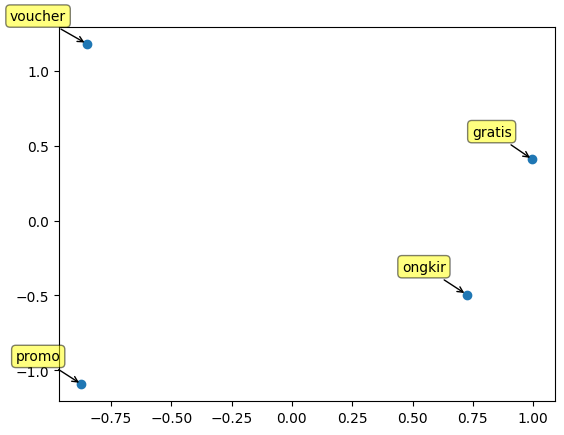

In [ ]:
plot(red_word_vectors, word_list)

## FastText

In [ ]:
# !pip -q install fasttext

In [ ]:
# Download dan unzip dataset
# Warning: proses download lama dan memakan diskspace yang besar
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
# !gunzip cc.en.300.bin.gz

In [ ]:
# import fasttext
# ft_model = fasttext.load_model("cc.en.300.bin")

In [ ]:
# print(ft_model['hadiah'])

In [ ]:
# list_kalimat = ['saya lapar saya tidak makan','saya tidak lapar saya makan']
# word_vectors_fasttext = np.array([ft_model[w] for w in list_kalimat])
# pca = PCA(n_components=2, copy=False, whiten=True)

# fasttext_word_vectors = pca.fit_transform(word_vectors_fasttext)

# plot(word_vectors_fasttext, list_kalimat)

# Deep Learning for NLP

## LSTM

### Data Splitting

In [ ]:
# Tentukan kolom yang akan digunkan
data = data[['clean_teks', 'label']]
data

,clean_teks,label
0,voucher voucher gofood ya minimal beli ribu la...,1
1,butuh voucher gofood gf,1
2,hidup lomba lawan teman lomba lawan hujan biar...,1
3,voucher gofood minimal beli ribu,1
4,gofood ya jam gin,1
...,...,...
985,gofood ongkirnya mahal makan,2
986,gofood tokped track driverny sihh kasih bintan...,2
987,mohon maaf serius ongkir gofood qmall rumah ri...,2
988,wuadu gofood promo pakai paylater ribet batttt,2


In [ ]:
data = data.dropna(axis=1)

In [ ]:
# Buat data uji, data latih, dan data validasi
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.2, random_state=5)
data_train, data_val = train_test_split(data_train, test_size=0.25, random_state=5)

In [ ]:
# Lihat shape dari masing-masing data
print(data_train.shape)
print(data_val.shape)
print(data_test.shape)

(594, 2)
(198, 2)
(198, 2)


In [ ]:
# Pisahkan kolom fitur dan target (label)
trainX = np.array(data_train.iloc[:, 0])
trainY = np.array(data_train.iloc[:, 1])

testX = np.array(data_test.iloc[:, 0])
testY = np.array(data_test.iloc[:, 1])

valX = np.array(data_val.iloc[:, 0])
valY = np.array(data_val.iloc[:, 1])

In [ ]:
# One-hot encoding

trainY = pd.get_dummies(trainY).values
testY = pd.get_dummies(testY).values
valY = pd.get_dummies(valY).values

In [ ]:
print(trainY.shape)
print(testY.shape)
print(valY.shape)

(594, 2)
(198, 2)
(198, 2)


In [ ]:
trainY

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

### Tokenizing Data

In [ ]:
'''
Proses vektorisasi teks dengan mengubah setiap teks menjadi token urutan bilangan int (setiap bilangan int menjadi indeks token dalam dictionary)
'''
from keras.preprocessing.text import Tokenizer

In [ ]:
NUM_WORDS = 100       # Frekuensi kemunculan kata. Hanya num_words-1 yang akan disimpan pada dictionary. Berarti kata dengan kemunculan >=100 tidak digunakan.
OOV_TOKEN = '<unk>'   # Token khusus untuk mengganti kata yang tidak terdaftar dalam dictionary.

tokenizer = Tokenizer(num_words=100, oov_token=OOV_TOKEN, lower=True)
tokenizer.fit_on_texts(trainX)

# Tambahkan token padding untuk menyamakan ukuran dimensi fitur input ke LSTM
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

word_index = tokenizer.word_index

In [ ]:
# Lihat dictionary yang telah dibuat proses tokenisasi
print(word_index)

{'<unk>': 1, 'gofood': 2, 'voucher': 3, 'promo': 4, 'gojekindonesia': 5, 'ya': 6, 'gojek': 7, 'akun': 8, 'bantu': 9, 'kena': 10, 'banget': 11, 'halo': 12, 'kode': 13, 'mohon': 14, 'nyaman': 15, 'banned': 16, 'soft': 17, 'terima': 18, 'makan': 19, 'kasih': 20, 'aktif': 21, 'claim': 22, 'goridegocargofood': 23, 'ribu': 24, 'mahal': 25, 'pesan': 26, 'jam': 27, 'beli': 28, 'ongkir': 29, 'enak': 30, 'diskon': 31, 'order': 32, 'pakai': 33, 'lapar': 34, 'pajak': 35, 'admin': 36, 'potong': 37, 'gf': 38, 'pas': 39, 'flash': 40, 'sale': 41, 'goco': 42, 'min': 43, 'resto': 44, 'guys': 45, 'terimakasih': 46, 'biaya': 47, 'error': 48, 'hilang': 49, 'masuk': 50, 'harga': 51, 'deh': 52, 'driver': 53, 'gratis': 54, 'tau': 55, 'langsung': 56, 'rumah': 57, 'habis': 58, 'malas': 59, 'softbanned': 60, 'orang': 61, 'mulu': 62, 'coba': 63, 'tolong': 64, 'nasi': 65, 'malam': 66, 'gocar': 67, 'masak': 68, 'nunggu': 69, 'shopeefood': 70, 'wtb': 71, 'grabfood': 72, 'mcd': 73, 'wts': 74, 'minimal': 75, 'yaa': 76

In [ ]:
len(word_index)

1105

### Text to Sequences

In [ ]:
'''
Proses mengubah token teks menjadi urutan bilangan int.
'''
train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

In [ ]:
# Lihat hasil dari text to sequences
# Setiap bilang int merujuk pada indeks token yang ada dalam dictionary
print(train_seqs)

[[2, 2, 1, 1, 48, 5], [1, 2, 55, 87], [1, 2, 19, 1, 1, 1, 1, 1, 1], [12, 5, 8, 10, 17, 16, 3, 23, 22, 13, 4, 14, 9, 15, 21, 7, 18, 20], [88, 98, 2, 48], [40, 41, 49], [1, 98, 66, 89, 1, 2, 1, 1, 1, 1], [40, 41, 2, 27, 1, 31, 6], [5, 1, 11, 3, 2], [12, 5, 8, 10, 17, 16, 6, 3, 23, 50, 3, 99, 22, 13, 4, 14, 9, 15, 21, 7, 18, 20], [12, 5, 8, 10, 17, 16, 6, 3, 23, 22, 13, 4, 14, 9, 15, 21, 7, 18, 20], [30, 1, 6, 2], [59, 11, 29, 2, 11, 1, 1, 4], [1, 1, 1, 2, 51], [1, 5, 8, 7, 10, 60, 1, 3, 89, 1, 67, 14, 9, 36, 18, 20], [43, 26, 2, 18, 1, 1, 1, 26, 5], [33, 2, 1], [1, 1, 1, 28, 29, 2, 1, 1, 1, 51, 1, 29, 25, 29, 1], [72, 2, 1, 31], [1, 1, 1, 66, 2, 73], [3, 72, 2, 3, 37, 78], [79, 2, 1, 1, 1, 56, 1], [1, 1, 1, 78, 25], [61, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 57, 4, 1, 29, 1, 1], [2, 27], [1, 28, 1, 1, 1, 1, 1, 1, 2, 1, 56, 1], [33, 1, 2, 80, 10, 1], [1, 1, 1, 1, 44, 2, 28, 30, 1, 1], [1, 1, 2], [3, 2, 38], [58, 1, 1, 1, 1, 11, 1, 33, 2], [12, 5, 8, 10, 17, 16, 6, 3, 23, 22, 13,

In [ ]:
print(trainX[10])
print(train_seqs[10])

halo gojekindonesia akun kena soft banned ya voucher goridegocargofood claim kode promo mohon bantu nyaman aktif gojek terima kasih
[12, 5, 8, 10, 17, 16, 6, 3, 23, 22, 13, 4, 14, 9, 15, 21, 7, 18, 20]


### Padding & Truncate

In [ ]:
'''
Proses mengubah data dari sequence menjadi array bentuk 2D Numpy (num_samples, num_timesteps).
num_timesteps adalah argumen maxlen jika disediakan, atau panjang dari sequence terpanjang dalam daftar.

Sequence yang lebih pendek dari num_timesteps diisi dengan nilai hingga panjangnya sama dengan num_timesteps (padding).
Sequence yang lebih panjang dari num_timesteps dipotong sehingga sesuai dengan panjang yang diinginkan (truncate).
'''

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Lihat distribusi jumlah kata dalam X_train_seq.
# Pada contoh ini, max_len tidak ditentukan, sehingga semua data dari sequence akan di padding menjad panjang sesuai dengan sequnce terpanjang
l = [len(i) for i in train_seqs]
l = np.array(l)

print('minimum number of words: {}'.format(l.min()))
print('median number of words: {}'.format(np.median(l)))
print('average number of words: {}'.format(l.mean()))
print('maximum number of words: {}'.format(l.max()))

minimum number of words: 1
median number of words: 7.0
average number of words: 9.612794612794612
maximum number of words: 29


In [ ]:
PADDING = 'pre' # Terdapat dua pilihan dalam melakukan padding 'pre' or 'post'.

train_seqs = pad_sequences(train_seqs, padding=PADDING)
val_seqs = pad_sequences(val_seqs, padding=PADDING)
test_seqs = pad_sequences(test_seqs, padding=PADDING)

In [ ]:
print(trainX[10])
print(train_seqs[10])

halo gojekindonesia akun kena soft banned ya voucher goridegocargofood claim kode promo mohon bantu nyaman aktif gojek terima kasih
[ 0  0  0  0  0  0  0  0  0  0 12  5  8 10 17 16  6  3 23 22 13  4 14  9
 15 21  7 18 20]


### Define Model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Flatten

model_LSTM = Sequential()
model_LSTM.add(Embedding(len(word_index), 200))
model_LSTM.add(LSTM(100))
model_LSTM.add(Dense(2, activation='softmax'))

In [ ]:
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training

In [ ]:
%%time

EPOCH = 10
BATCH_SIZE = 32

history_LSTM = model_LSTM.fit(train_seqs, trainY, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(val_seqs, valY))

Epoch 1/10
19/19 [==============================] - 4s 83ms/step - loss: 0.6408 - accuracy: 0.6465 - val_loss: 0.5708 - val_accuracy: 0.6818
Epoch 2/10
19/19 [==============================] - 1s 52ms/step - loss: 0.5076 - accuracy: 0.7424 - val_loss: 0.5464 - val_accuracy: 0.7323
Epoch 3/10
19/19 [==============================] - 1s 52ms/step - loss: 0.4436 - accuracy: 0.8030 - val_loss: 0.4858 - val_accuracy: 0.7424
Epoch 4/10
19/19 [==============================] - 1s 52ms/step - loss: 0.4022 - accuracy: 0.8199 - val_loss: 0.4834 - val_accuracy: 0.7677
Epoch 5/10
19/19 [==============================] - 1s 54ms/step - loss: 0.3620 - accuracy: 0.8333 - val_loss: 0.4671 - val_accuracy: 0.7576
Epoch 6/10
19/19 [==============================] - 2s 92ms/step - loss: 0.3535 - accuracy: 0.8418 - val_loss: 0.4613 - val_accuracy: 0.7828
Epoch 7/10
19/19 [==============================] - 2s 93ms/step - loss: 0.3390 - accuracy: 0.8468 - val_loss: 0.4413 - val_accuracy: 0.7828
Epoch 8/10
19

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

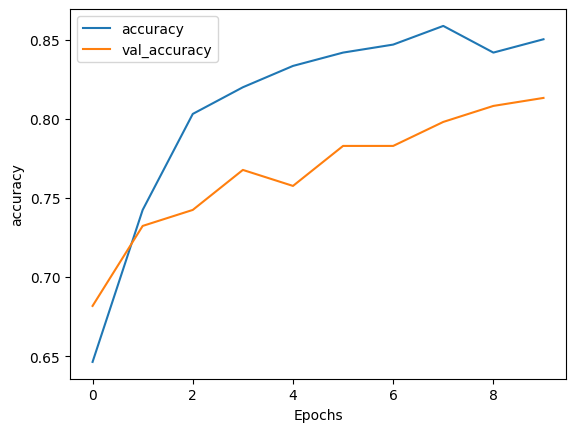

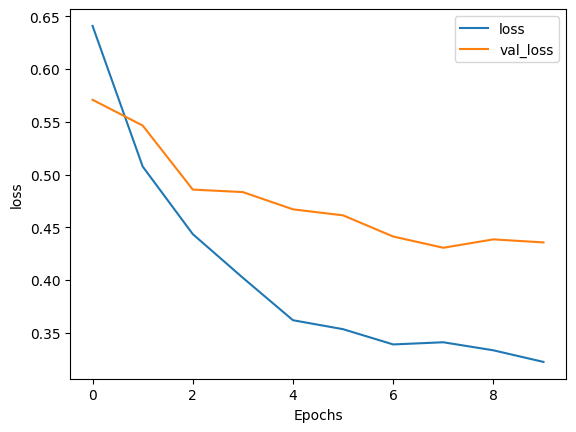

In [ ]:
plot_graphs(history_LSTM, 'accuracy')
plot_graphs(history_LSTM, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_LSTM.history['accuracy'][i], history_LSTM.history['loss'][i], history_LSTM.history['val_accuracy'][i], history_LSTM.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.646465 	   0.640825 	   0.681818 	   0.570842
       2   0.742424 	   0.507629 	   0.732323 	   0.546448
       3   0.803030 	   0.443569 	   0.742424 	   0.485770
       4   0.819865 	   0.402170 	   0.767677 	   0.483372
       5   0.833333 	   0.361979 	   0.757576 	   0.467056
       6   0.841751 	   0.353487 	   0.782828 	   0.461332
       7   0.846801 	   0.339038 	   0.782828 	   0.441287
       8   0.858586 	   0.341105 	   0.797980 	   0.430639
       9   0.841751 	   0.333477 	   0.808081 	   0.438585
      10   0.850168 	   0.322474 	   0.813131 	   0.435693


### Evaluate

In [ ]:
# Lakukan prediksi pada data uji
y_pred = np.argmax(model_LSTM.predict(test_seqs), axis=1)
y_true = np.argmax(testY, axis=1)

loss, accuracy = model_LSTM.evaluate(test_seqs, testY)

7/7 [==============================] - 1s 15ms/step - loss: 0.4368 - accuracy: 0.7828


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81       125
           1       0.65      0.90      0.75        73

    accuracy                           0.78       198
   macro avg       0.79      0.81      0.78       198
weighted avg       0.82      0.78      0.79       198



## BiLSTM + Word Embedding

In [ ]:
# Load word2vec yang telah kita simpan
from gensim.models import KeyedVectors

my_word2vec = KeyedVectors.load('myvec-word2vec-100.wordvectors', mmap='r')
my_word2vec_vocab = my_word2vec.key_to_index

VOCAB_SIZE = len(my_word2vec_vocab)
EMBEDDING_SIZE = my_word2vec.vector_size

print(VOCAB_SIZE)
print(EMBEDDING_SIZE)

1502
50


In [ ]:
word2vec_dict = {}

for word in my_word2vec_vocab:
    word2vec_dict[word] = my_word2vec.get_vector(word)

print('The numbers of key-value pairs: ', len(word2vec_dict)) # Harus sama dengan ukuran vocab word2vec

The numbers of key-value pairs:  1502


### Token to Embedding

In [ ]:
EMBEDDING_MATRIX = np.zeros(shape=(len(word_index), EMBEDDING_SIZE))

for word, i in tokenizer.word_index.items():
  embed_vector = word2vec_dict.get(word)
  if embed_vector is not None:               # Word is in the vocabulary learned by the w2v model
    EMBEDDING_MATRIX[i] = embed_vector

### Define Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout
from tensorflow.keras.initializers import Constant

model_BiLSTM_w2v = Sequential()
model_BiLSTM_w2v.add(Embedding(len(word_index), 50, embeddings_initializer = Constant(EMBEDDING_MATRIX)))
model_BiLSTM_w2v.add(Bidirectional(LSTM(64)))
model_BiLSTM_w2v.add(Dropout(0.2))
model_BiLSTM_w2v.add(Dense(2, activation='softmax'))

In [ ]:
# Compile model
model_BiLSTM_w2v.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
%%time

EPOCH = 75
BATCH_SIZE = 32

history_BiLSTM_w2v = model_BiLSTM_w2v.fit(train_seqs, trainY, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(val_seqs, valY))

Epoch 1/75
19/19 [==============================] - 6s 133ms/step - loss: 0.5886 - accuracy: 0.6448 - val_loss: 0.5520 - val_accuracy: 0.6768
Epoch 2/75
19/19 [==============================] - 1s 56ms/step - loss: 0.5084 - accuracy: 0.7020 - val_loss: 0.5144 - val_accuracy: 0.7525
Epoch 3/75
19/19 [==============================] - 1s 38ms/step - loss: 0.4667 - accuracy: 0.7896 - val_loss: 0.4718 - val_accuracy: 0.7980
Epoch 4/75
19/19 [==============================] - 1s 38ms/step - loss: 0.4321 - accuracy: 0.7946 - val_loss: 0.4598 - val_accuracy: 0.7727
Epoch 5/75
19/19 [==============================] - 1s 37ms/step - loss: 0.3990 - accuracy: 0.8232 - val_loss: 0.4525 - val_accuracy: 0.7929
Epoch 6/75
19/19 [==============================] - 1s 37ms/step - loss: 0.3846 - accuracy: 0.8165 - val_loss: 0.4290 - val_accuracy: 0.7778
Epoch 7/75
19/19 [==============================] - 1s 37ms/step - loss: 0.3616 - accuracy: 0.8300 - val_loss: 0.4259 - val_accuracy: 0.7980
Epoch 8/75
1

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

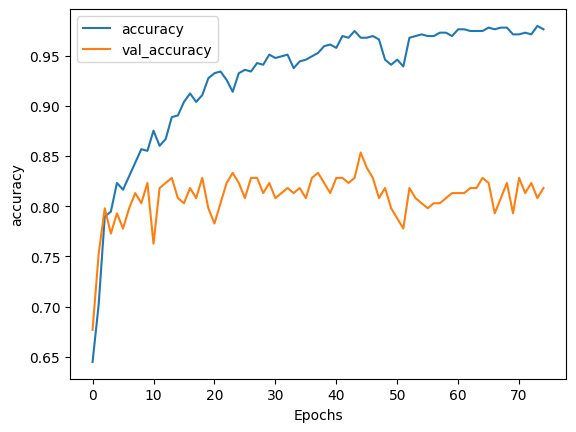

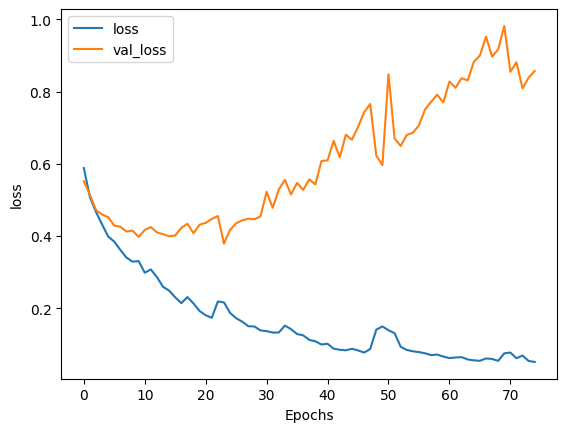

In [ ]:
plot_graphs(history_BiLSTM_w2v, 'accuracy')
plot_graphs(history_BiLSTM_w2v, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_BiLSTM_w2v.history['accuracy'][i], history_BiLSTM_w2v.history['loss'][i], history_BiLSTM_w2v.history['val_accuracy'][i], history_BiLSTM_w2v.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.644781 	   0.588560 	   0.676768 	   0.551959
       2   0.702020 	   0.508424 	   0.752525 	   0.514410
       3   0.789562 	   0.466656 	   0.797980 	   0.471835
       4   0.794613 	   0.432115 	   0.772727 	   0.459773
       5   0.823232 	   0.398984 	   0.792929 	   0.452465
       6   0.816498 	   0.384601 	   0.777778 	   0.428980
       7   0.829966 	   0.361585 	   0.797980 	   0.425901
       8   0.843434 	   0.340528 	   0.813131 	   0.412502
       9   0.856902 	   0.329280 	   0.803030 	   0.415257
      10   0.855219 	   0.330762 	   0.823232 	   0.397554
      11   0.875421 	   0.298657 	   0.762626 	   0.417338
      12   0.860269 	   0.307674 	   0.818182 	   0.424733
      13   0.867003 	   0.286378 	   0.823232 	   0.410295
      14   0.888889 	   0.259658 	   0.828283 	   0.405323
      15   0.890572 	   0.248868 	   0.808081 	   0.399476
      16   0.904040 	   0.230460 	   0.803030 

In [ ]:
# Lakukan prediksi pada data uji
y_pred = np.argmax(model_BiLSTM_w2v.predict(test_seqs), axis=1)
y_true = np.argmax(testY, axis=1)

loss, accuracy = model_BiLSTM_w2v.evaluate(test_seqs, testY)

7/7 [==============================] - 1s 10ms/step - loss: 0.9892 - accuracy: 0.8081


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       106
           1       0.76      0.85      0.80        92

    accuracy                           0.81       198
   macro avg       0.81      0.81      0.81       198
weighted avg       0.81      0.81      0.81       198



In [ ]:
# trainY

In [ ]:
# max_len = trainY.shape[0]

In [ ]:
# ann = Sequential()
# ann.add(Dense(32, activation="elu", input_shape=(max_len)))
# ann.add(Dense(1024, activation="elu"))
# ann.add(Dense(512, activation="elu"))
# ann.add(Dense(256, activation="elu"))
# ann.add(Dense(128, activation="elu"))
# ann.add(Dense(16))
# ann.add(Activation("sigmoid"))


## Fine Tuning

In [ ]:
# Tentukan nilai hyperparamter untuk fine-tuning
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 5e-20

In [ ]:
%%time
bilstm_tuning = model_BiLSTM_w2v.fit(train_seqs, trainY, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_seqs, valY))

Epoch 1/50
10/10 [==============================] - 1s 50ms/step - loss: 0.0484 - accuracy: 0.9832 - val_loss: 0.8873 - val_accuracy: 0.8232
Epoch 2/50
10/10 [==============================] - 0s 51ms/step - loss: 0.0479 - accuracy: 0.9798 - val_loss: 0.9015 - val_accuracy: 0.8030
Epoch 3/50
10/10 [==============================] - 0s 49ms/step - loss: 0.0505 - accuracy: 0.9781 - val_loss: 0.8950 - val_accuracy: 0.8030
Epoch 4/50
10/10 [==============================] - 0s 47ms/step - loss: 0.0474 - accuracy: 0.9832 - val_loss: 0.9054 - val_accuracy: 0.8081
Epoch 5/50
10/10 [==============================] - 0s 47ms/step - loss: 0.0459 - accuracy: 0.9798 - val_loss: 0.9248 - val_accuracy: 0.8081
Epoch 6/50
10/10 [==============================] - 0s 46ms/step - loss: 0.0490 - accuracy: 0.9798 - val_loss: 0.9267 - val_accuracy: 0.8081
Epoch 7/50
10/10 [==============================] - 1s 50ms/step - loss: 0.0478 - accuracy: 0.9798 - val_loss: 0.9341 - val_accuracy: 0.8030
Epoch 8/50
10

In [ ]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

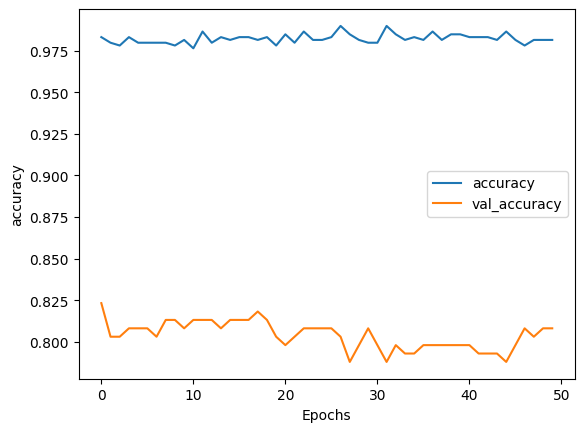

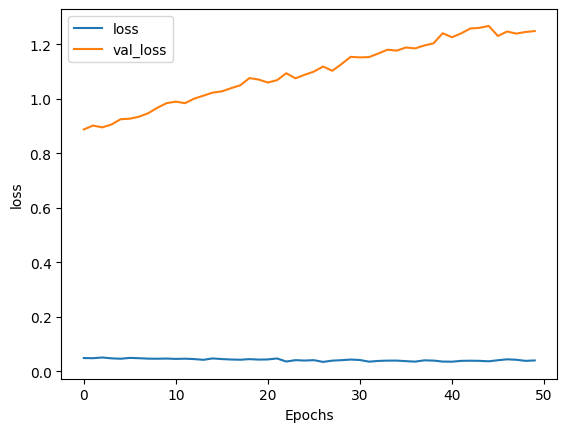

In [ ]:
plot_graphs(bilstm_tuning, 'accuracy')
plot_graphs(bilstm_tuning, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCHS):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bilstm_tuning.history['accuracy'][i], bilstm_tuning.history['loss'][i], bilstm_tuning.history['val_accuracy'][i], bilstm_tuning.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.983165 	   0.048409 	   0.823232 	   0.887310
       2   0.979798 	   0.047893 	   0.803030 	   0.901535
       3   0.978114 	   0.050456 	   0.803030 	   0.894985
       4   0.983165 	   0.047411 	   0.808081 	   0.905377
       5   0.979798 	   0.045864 	   0.808081 	   0.924849
       6   0.979798 	   0.048991 	   0.808081 	   0.926706
       7   0.979798 	   0.047850 	   0.803030 	   0.934100
       8   0.979798 	   0.046242 	   0.813131 	   0.946947
       9   0.978114 	   0.045914 	   0.813131 	   0.967055
      10   0.981481 	   0.046585 	   0.808081 	   0.983855
      11   0.976431 	   0.045275 	   0.813131 	   0.989376
      12   0.986532 	   0.046140 	   0.813131 	   0.983719
      13   0.979798 	   0.044588 	   0.813131 	   1.000349
      14   0.983165 	   0.041961 	   0.808081 	   1.011283
      15   0.981481 	   0.047040 	   0.813131 	   1.022434
      16   0.983165 	   0.044652 	   0.813131 

In [ ]:
score = model_BiLSTM_w2v.evaluate(val_seqs, valY)

print("Test Accuracy:", score[1])

7/7 [==============================] - 0s 8ms/step - loss: 1.2482 - accuracy: 0.8081
Test Accuracy: 0.808080792427063


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       106
           1       0.76      0.85      0.80        92

    accuracy                           0.81       198
   macro avg       0.81      0.81      0.81       198
weighted avg       0.81      0.81      0.81       198



In [ ]:
pickle.dump(bilstm_tuning,open("bilstm.pkl","wb"))

In [ ]:
model_BiLSTM_w2v.save_weights('bert-model.h5')